In [8]:
from scipy.stats import chi2
import numpy as np 
from scipy import stats
from scipy.special import comb
import matplotlib.pyplot as plt
observed_heads = 46
H_0 = p = .5
H_1 = .46
number_of_trials = 100
#number_of_heads_2 = np.random.binomial(number_of_trials, .3, 100000)
number_of_heads = np.random.binomial(number_of_trials, .5, 100000)
t_μ = []
α = .05


In [9]:
for i in number_of_heads:
    L_0 = comb(number_of_trials,i)*(p**i)*(1-p)**(number_of_trials-i)
    H_prof = i/number_of_trials
    #L_1 = comb(number_of_trials,i)*(H_1**i)*(1-H_1)**(number_of_trials-i)
    L_1 = comb(number_of_trials,i)*(H_prof**i)*(1-H_prof)**(number_of_trials-i)
    λ = L_0/L_1
    t = -2*np.log(λ)
    t_μ.append(t)

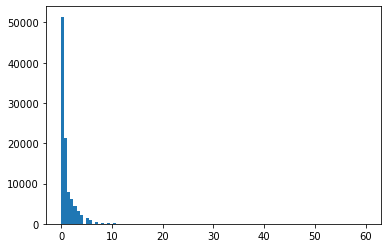

t observed:   0.640684420309173


In [10]:
plt.hist(t_μ, bins=100,range = (0,60))#hist(t_μ,20)
plt.show()
L_0_obs = comb(number_of_trials,observed_heads)*(p**observed_heads)*(1-p)**(number_of_trials-observed_heads)
L_1_obs = comb(number_of_trials,observed_heads)*(H_1**observed_heads)*(1-H_1)**(number_of_trials-observed_heads)
λ = L_0_obs/L_1_obs
t_observed = -2*np.log(λ)
#p_value = 1 - chi2.cdf(t_observed, 1)
print("t observed:  ",t_observed)

In [11]:
p_value = 0
for j in t_μ :
    if  j >= t_observed:
        p_value = p_value +j

    
print(2*p_value/100000)    

1.7838132486004032


In [12]:
dist = stats.chi2
bounds = [(0,32)]

res = stats.fit(dist, t_μ, bounds)

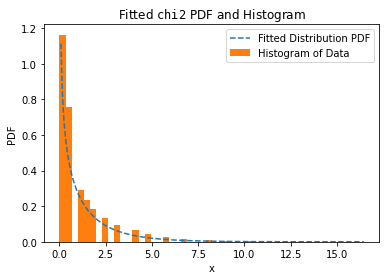

In [6]:
res.plot()
plt.show()

In [7]:
res


  params: FitParams(df=1.2409967287257715, loc=0.0, scale=1.0)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.'